In [2]:
from train import train_model
import load_data_jax_metrics
import training_jax_lossvariance_real as train
import importlib 
import numpy as np



In [3]:
dataset_list=['sp500','btc']
sample_size_list=[5,5,4,5,5] #the sample size for each dataset, for euro and legendre this is 5.  For mackey is 4

qubits_list=[2,4,6,8,10,12] #in the paper we utilize 2,4,6 or 8 
hidden_list=[16]#[16,32,48,64]
key_list=[1,2,3,4,5,6,7,8,9,0]
kernel_size=2
architecture='super_parallel' #options are no_reupload, parallel and super_parallel
#point_list=[268,518,768,1018,1268,1518,1768,2018,2268,3518,2768,3018,3268,3518,3768,4018]
point_list=[1000]
 # if you want to work with parallel ansatz indicate the number of layers in the loop below in variable n_layers
 

For generating plots of time varying number of points
=======================================================

In [4]:
times=np.zeros((int(len(point_list)),int(len(key_list))))
for p in range(len(point_list)):  
    points=point_list[p] 
    for k in range(len(key_list)):
        key=key_list[k]
        for d in range(len(dataset_list)):
            dataset=dataset_list[d]
            seq_len=sample_size_list[d]
            
            X_train,Y_train,X_test,Y_test,trainloader,testloader,data,features=load_data_jax_metrics.data(dataset,points)
            print(features)
            target_size=features
            for q in range(len(qubits_list)):
                n_qubits=qubits_list[q]
                if architecture=='super_parallel':
                    n_layers=n_qubits//kernel_size
                elif architecture=='parallel' or architecture=='no_reupload':
                    n_layers=4
                for h in range(len(hidden_list)):
                    concat_size=hidden_list[h]
                    #run_Name=dataset+ansatz+str(out_channels)+str(n_layers)+str(architecture)+str(key)
                    run_name=dataset+str(concat_size)+str(n_qubits)+str(key)+str('Xavier')
                    train.train_model(X_train,Y_train,X_test,Y_test,trainloader,testloader,data,run_name,dataset, seq_len,n_layers,n_qubits,concat_size,target_size,key)
                        

#np.savetxt('times_varyingpoints.csv',times)

1
(1, 5, 1)


RuntimeError: Serialization failed for decorator hybrid job. If you are referencing an object from outside the function scope, either directly or through function parameters, try instantiating the object inside the decorated function instead.

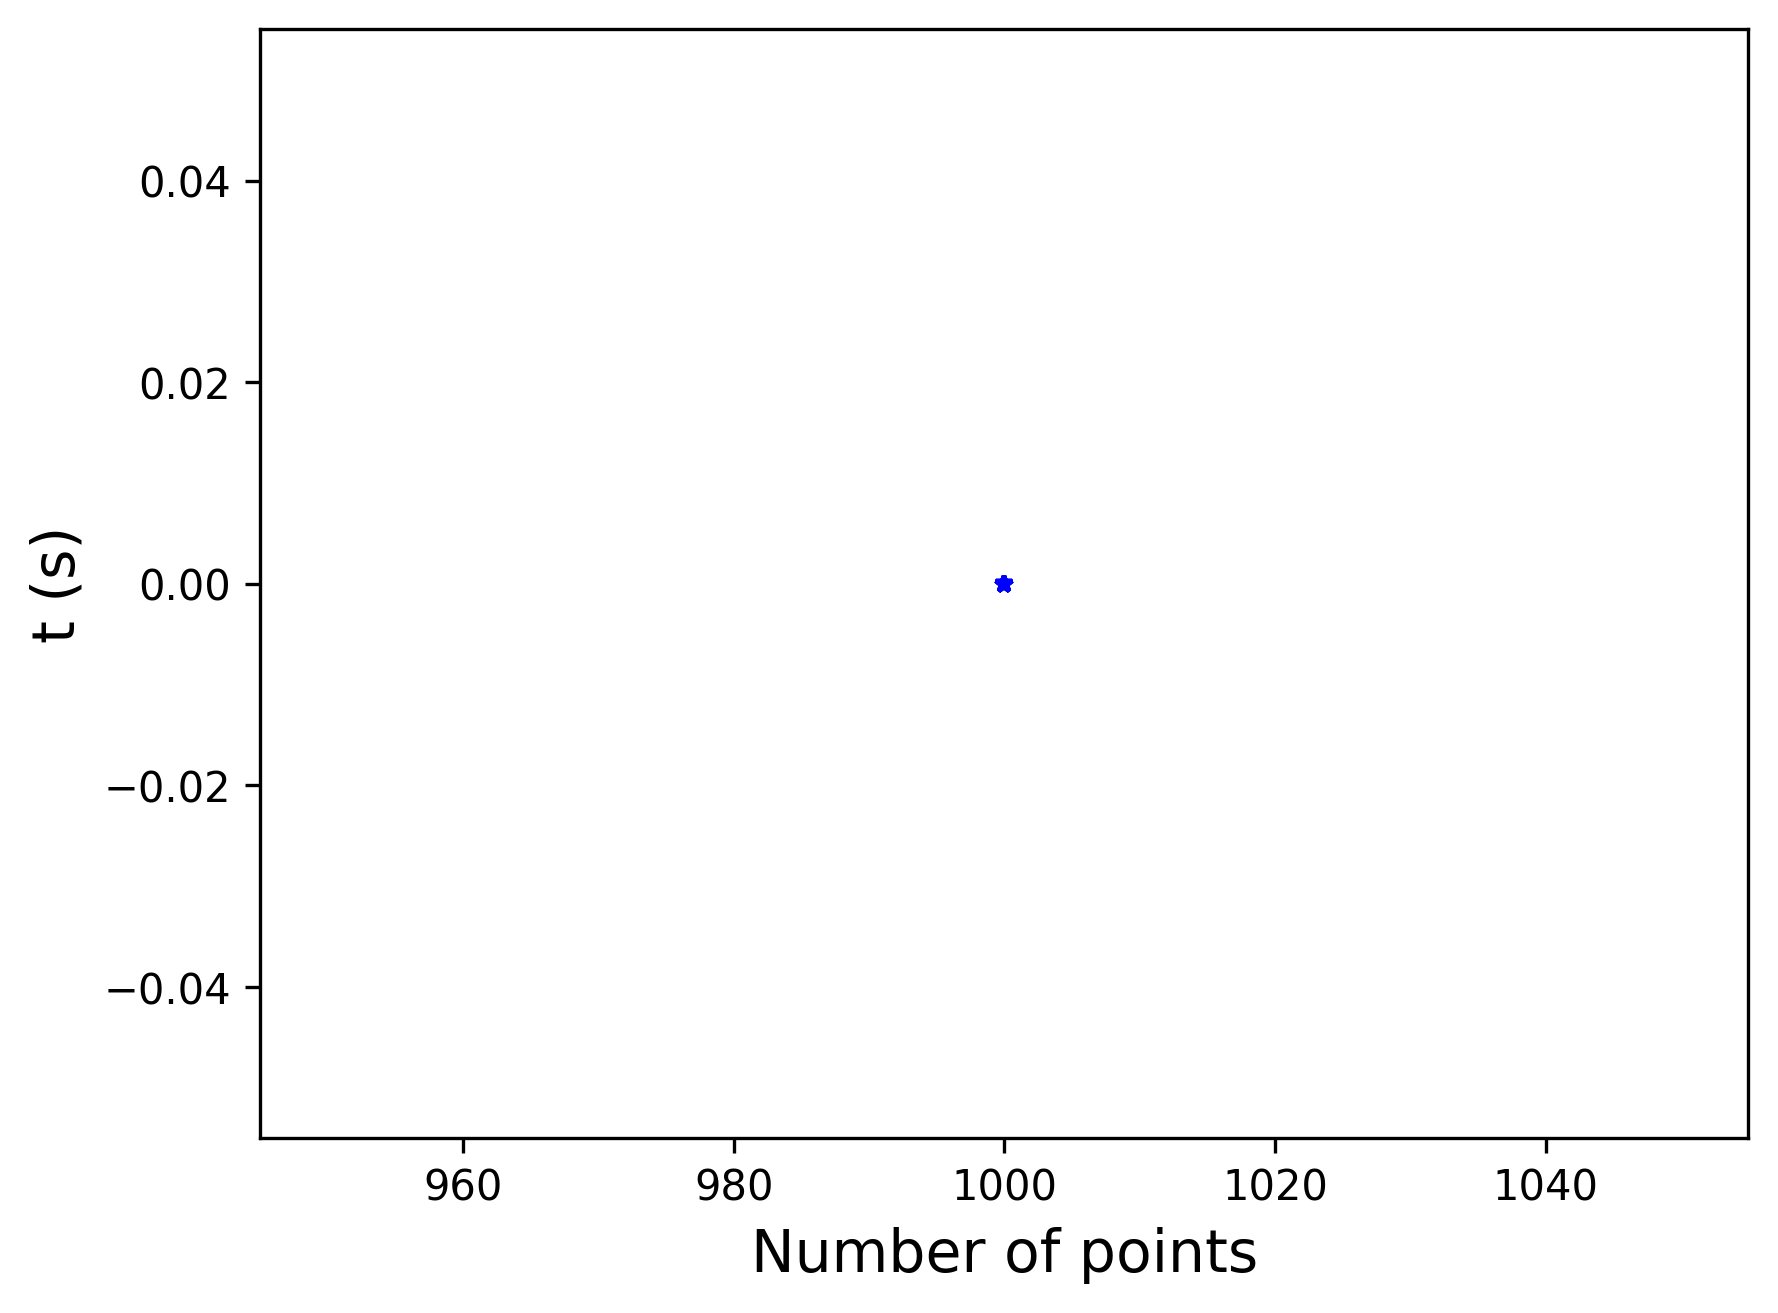

In [10]:
import matplotlib.pyplot as plt
# Asegurarse de que point_list sea un array de NumPy (si no lo es ya)
point_list = np.array(point_list)

# Configuración de la figura con un DPI de 300
plt.figure(dpi=300)

# Graficar los puntos en el mismo color (ej: azul)
for k in range(len(key_list)):
    plt.plot(point_list, times[:,k], '*', color='blue',markersize=4)

# Etiquetas de los ejes
plt.xlabel('Number of points',fontsize=14)
plt.ylabel('t (s)',fontsize=14)

# Mostrar la gráfica
plt.show()

For generating the plot of the qubits dependence
==================================================

In [11]:
dataset_list=['mackey']
sample_size_list=[4] #the sample size for each dataset, for euro and legendre this is 5.  For mackey is 4
qubits_list=[14,12,10,8,6,4,2] #in the paper we utilize 2,4,6 or 8 
ansatz_list=['basic_layers']
key_list=[1,2,3,4,5,6,7,8,9,0]
kernel_size=2
architecture='super_parallel' #options are no_reupload, parallel and super_parallel
point_list=[268]

In [12]:
times=np.zeros((int(len(point_list)),int(len(key_list))))
for p in range(len(point_list)):  
    points=point_list[p] 
    for k in range(len(key_list)):
        key=key_list[k]
        for d in range(len(dataset_list)):
            dataset=dataset_list[d]
            l=sample_size_list[d]
            out_size = (l + 2*(1) - kernel_size) // 1 + 1 #since paddding and stride are 1
        
            X_train,Y_train,trainloader,data=load_data_jax.data(dataset,points)
            for q in range(len(qubits_list)):
                out_channels=qubits_list[q]
                if architecture=='super_parallel':
                    n_layers=out_channels//kernel_size
                elif architecture=='parallel' or architecture=='no_reupload':
                    n_layers=4
                for a in range(len(ansatz_list)):
                    ansatz=ansatz_list[a]
                    #run_Name=dataset+ansatz+str(out_channels)+str(n_layers)+str(architecture)+str(key)
                    run_Name='timeC_varyingqubit_1f_withjit_5ep_vect_cpu'
                    time=training_jax.train_testing_phase(X_train,Y_train,kernel_size,n_layers,ansatz,l,out_channels,trainloader,run_Name,dataset,data,architecture,key)
                    times[p,k]=time

np.savetxt('times_varyingqubits.csv',times)

NameError: name 'load_data_jax' is not defined

(7, 10)


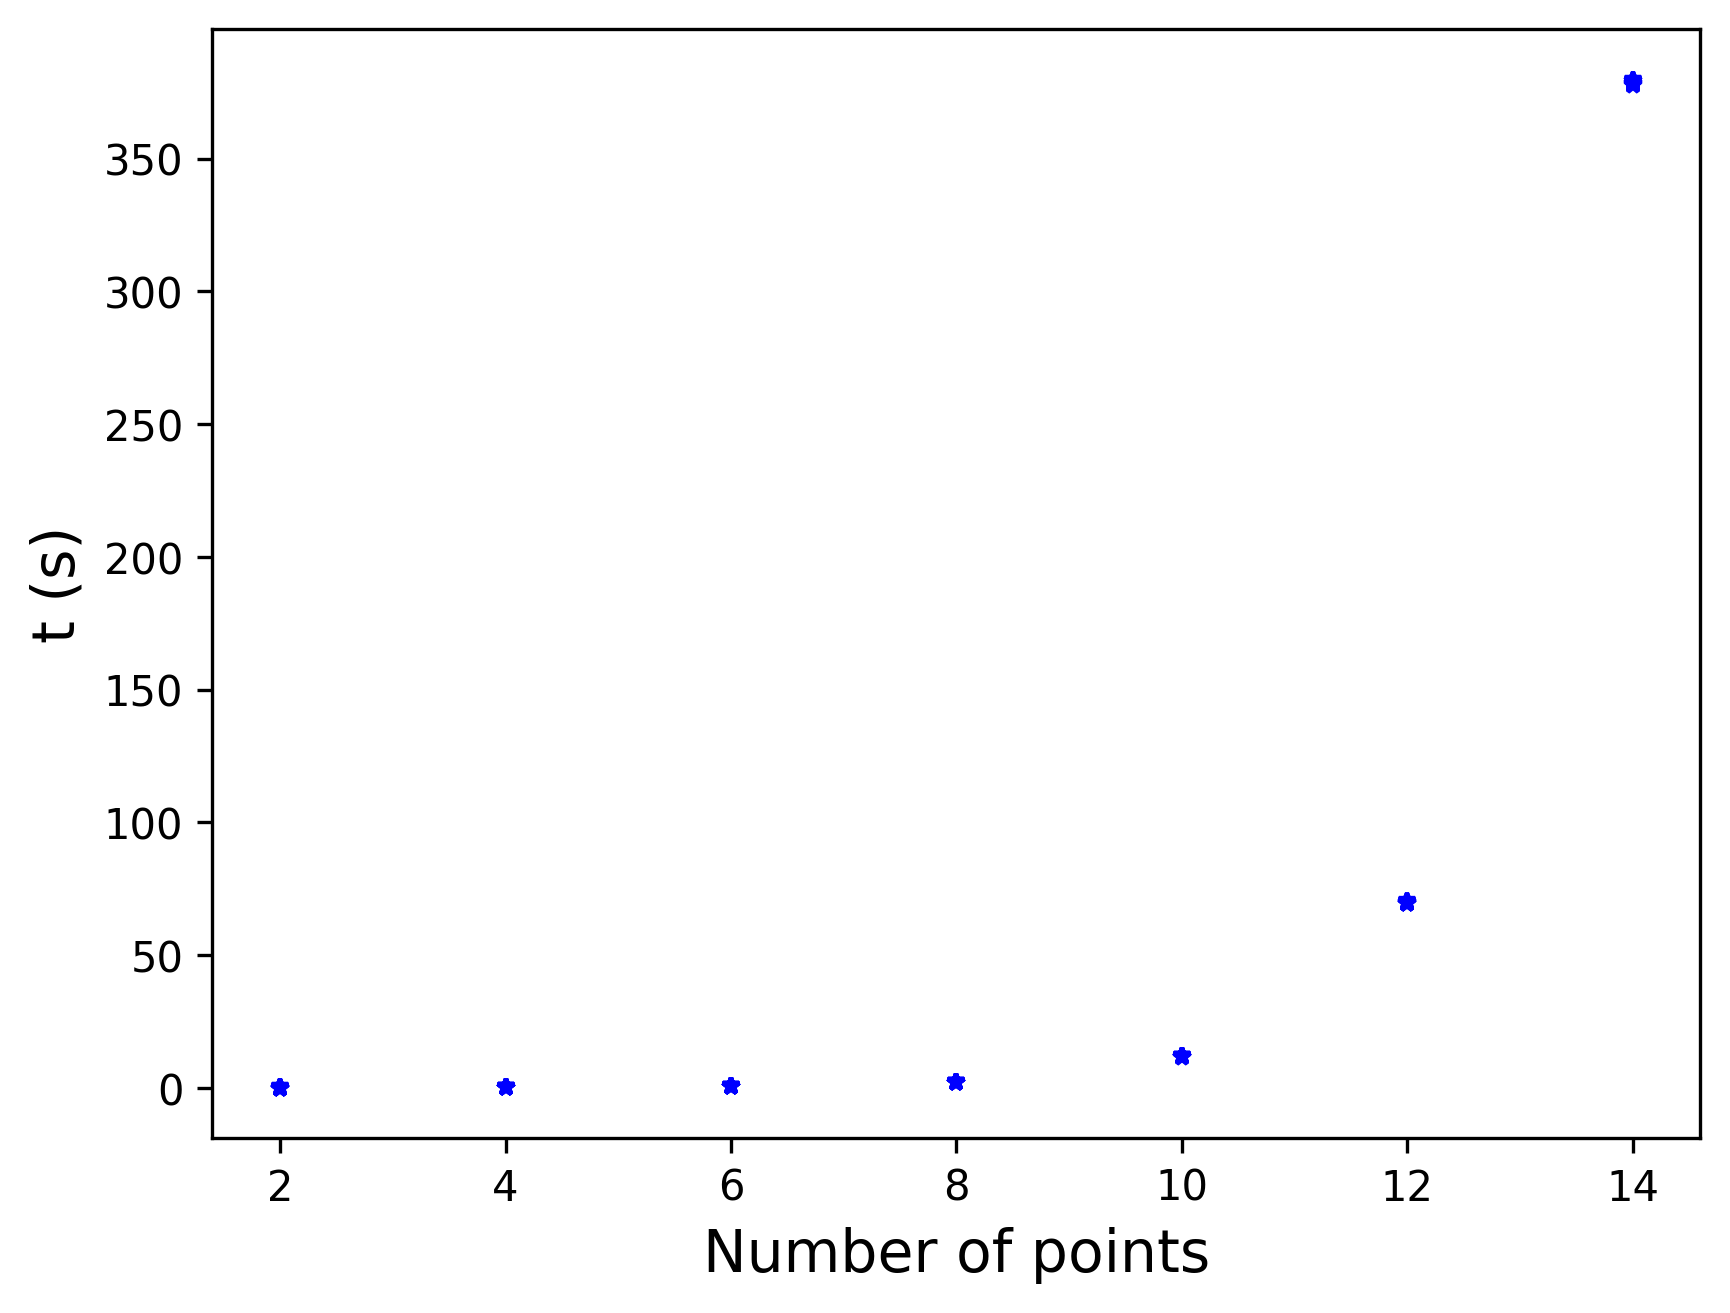

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
times=np.genfromtxt('times_varyingqubits.csv',delimiter=',')
print(times.shape)
# Asegurarse de que point_list sea un array de NumPy (si no lo es ya)
qubits_list = np.array(qubits_list)

# Configuración de la figura con un DPI de 300
plt.figure(dpi=300)

# Graficar los puntos en el mismo color (ej: azul)
for k in range(len(key_list)):
    plt.plot(qubits_list, times[:,k], '*', color='blue',markersize=4)

# Etiquetas de los ejes
plt.xlabel('Number of points',fontsize=14)
plt.ylabel('t (s)',fontsize=14)

# Mostrar la gráfica
plt.show()

Now we calculate for 1 to 5 features

In [ ]:
dataset_list=['sp500','sp500_2d','sp500_3d','sp500_4d','sp500_5d']
sample_size_list=[4,4,4,4,4] #the sample size for each dataset, for euro and legendre this is 5.  For mackey is 4
qubits_list=[6] #in the paper we utilize 2,4,6 or 8 
ansatz_list=['basic_layers']
key_list=[1,2,3,4,5,6,7,8,9,0]
kernel_size=2
architecture='super_parallel' #options are no_reupload, parallel and super_parallel
point_list=[268]

In [ ]:
times=np.zeros((int(len(dataset_list)),int(len(key_list))))
for p in range(len(point_list)):  
    points=point_list[p] 
    for k in range(len(key_list)):
        key=key_list[k]
        for d in range(len(dataset_list)):
            dataset=dataset_list[d]
            l=sample_size_list[d]
            out_size = (l + 2*(1) - kernel_size) // 1 + 1 #since paddding and stride are 1
        
            X_train,Y_train,trainloader,data=load_data_jax.data(dataset,points)
            for q in range(len(qubits_list)):
                out_channels=qubits_list[q]
                if architecture=='super_parallel':
                    n_layers=out_channels//kernel_size
                elif architecture=='parallel' or architecture=='no_reupload':
                    n_layers=4
                for a in range(len(ansatz_list)):
                    ansatz=ansatz_list[a]
                    #run_Name=dataset+ansatz+str(out_channels)+str(n_layers)+str(architecture)+str(key)
                    run_Name='timeC_varyingqubit_1f_withjit_5ep_vect_cpu'
                    time=training_jax.train_testing_phase(X_train,Y_train,kernel_size,n_layers,ansatz,l,out_channels,trainloader,run_Name,dataset,data,architecture,key)
                    times[d,k]=time

np.savetxt('times_varyingqubits.csv',times)

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

(1, 1, 5)
el shape del inp (1, 1, 5)
Starting epoch 1
[Epoch 1] loss: 0.676590
Starting epoch 2
[Epoch 2] loss: 0.129990
Starting epoch 3
[Epoch 3] loss: 0.010394
Starting epoch 4
[Epoch 4] loss: 0.002862
Starting epoch 5
[Epoch 5] loss: 0.003790
El tiempo de entrenamiento fue: 1.5540542602539062


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

2
(1, 2, 5)
el shape del inp (1, 2, 5)
Starting epoch 1
[Epoch 1] loss: 0.197818
Starting epoch 2
[Epoch 2] loss: 0.037926
Starting epoch 3
[Epoch 3] loss: 0.017508
Starting epoch 4
[Epoch 4] loss: 0.008895
Starting epoch 5
[Epoch 5] loss: 0.005846
El tiempo de entrenamiento fue: 8.403752326965332


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

3
(1, 3, 5)
el shape del inp (1, 3, 5)
Starting epoch 1
[Epoch 1] loss: 0.198059
Starting epoch 2
[Epoch 2] loss: 0.038053
Starting epoch 3
[Epoch 3] loss: 0.017577
Starting epoch 4
[Epoch 4] loss: 0.008938
Starting epoch 5
[Epoch 5] loss: 0.005879
El tiempo de entrenamiento fue: 8.327033281326294


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

4
(1, 4, 5)
el shape del inp (1, 4, 5)
Starting epoch 1
[Epoch 1] loss: 0.198069
Starting epoch 2
[Epoch 2] loss: 0.038034
Starting epoch 3
[Epoch 3] loss: 0.017570
Starting epoch 4
[Epoch 4] loss: 0.008935
Starting epoch 5
[Epoch 5] loss: 0.005878
El tiempo de entrenamiento fue: 8.420772075653076


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

5
(1, 5, 5)
el shape del inp (1, 5, 5)
Starting epoch 1
[Epoch 1] loss: 0.195819
Starting epoch 2
[Epoch 2] loss: 0.045135
Starting epoch 3
[Epoch 3] loss: 0.031645
Starting epoch 4
[Epoch 4] loss: 0.025911
Starting epoch 5
[Epoch 5] loss: 0.023871
El tiempo de entrenamiento fue: 8.283176898956299


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

(1, 1, 5)
el shape del inp (1, 1, 5)
Starting epoch 1
[Epoch 1] loss: 1.198015
Starting epoch 2
[Epoch 2] loss: 0.391957
Starting epoch 3
[Epoch 3] loss: 0.090018
Starting epoch 4
[Epoch 4] loss: 0.015568
Starting epoch 5
[Epoch 5] loss: 0.003387
El tiempo de entrenamiento fue: 1.6192810535430908


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

2
(1, 2, 5)
el shape del inp (1, 2, 5)
Starting epoch 1
[Epoch 1] loss: 0.277447
Starting epoch 2
[Epoch 2] loss: 0.022697
Starting epoch 3
[Epoch 3] loss: 0.012076
Starting epoch 4
[Epoch 4] loss: 0.008304
Starting epoch 5
[Epoch 5] loss: 0.006895
El tiempo de entrenamiento fue: 8.286861419677734


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

3
(1, 3, 5)
el shape del inp (1, 3, 5)
Starting epoch 1
[Epoch 1] loss: 0.277419
Starting epoch 2
[Epoch 2] loss: 0.022792
Starting epoch 3
[Epoch 3] loss: 0.012129
Starting epoch 4
[Epoch 4] loss: 0.008341
Starting epoch 5
[Epoch 5] loss: 0.006926
El tiempo de entrenamiento fue: 8.244515657424927


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

4
(1, 4, 5)
el shape del inp (1, 4, 5)
Starting epoch 1
[Epoch 1] loss: 0.277374
Starting epoch 2
[Epoch 2] loss: 0.022777
Starting epoch 3
[Epoch 3] loss: 0.012122
Starting epoch 4
[Epoch 4] loss: 0.008337
Starting epoch 5
[Epoch 5] loss: 0.006925
El tiempo de entrenamiento fue: 8.305180311203003


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

5
(1, 5, 5)
el shape del inp (1, 5, 5)
Starting epoch 1
[Epoch 1] loss: 0.297007
Starting epoch 2
[Epoch 2] loss: 0.033166
Starting epoch 3
[Epoch 3] loss: 0.027014
Starting epoch 4
[Epoch 4] loss: 0.025126
Starting epoch 5
[Epoch 5] loss: 0.024389
El tiempo de entrenamiento fue: 8.343791246414185


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

(1, 1, 5)
el shape del inp (1, 1, 5)
Starting epoch 1
[Epoch 1] loss: 0.006434
Starting epoch 2
[Epoch 2] loss: 0.008352
Starting epoch 3
[Epoch 3] loss: 0.006117
Starting epoch 4
[Epoch 4] loss: 0.005714
Starting epoch 5
[Epoch 5] loss: 0.005884
El tiempo de entrenamiento fue: 1.5834155082702637


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

2
(1, 2, 5)
el shape del inp (1, 2, 5)
Starting epoch 1
[Epoch 1] loss: 0.012154
Starting epoch 2
[Epoch 2] loss: 0.009981
Starting epoch 3
[Epoch 3] loss: 0.004895
Starting epoch 4
[Epoch 4] loss: 0.004035
Starting epoch 5
[Epoch 5] loss: 0.003922
El tiempo de entrenamiento fue: 8.333447933197021


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

3
(1, 3, 5)
el shape del inp (1, 3, 5)
Starting epoch 1
[Epoch 1] loss: 0.012200
Starting epoch 2
[Epoch 2] loss: 0.010034
Starting epoch 3
[Epoch 3] loss: 0.004934
Starting epoch 4
[Epoch 4] loss: 0.004071
Starting epoch 5
[Epoch 5] loss: 0.003960
El tiempo de entrenamiento fue: 8.373665571212769


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

4
(1, 4, 5)
el shape del inp (1, 4, 5)
Starting epoch 1
[Epoch 1] loss: 0.012196
Starting epoch 2
[Epoch 2] loss: 0.010030
Starting epoch 3
[Epoch 3] loss: 0.004934
Starting epoch 4
[Epoch 4] loss: 0.004072
Starting epoch 5
[Epoch 5] loss: 0.003961
El tiempo de entrenamiento fue: 8.015106439590454


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

5
(1, 5, 5)
el shape del inp (1, 5, 5)
Starting epoch 1
[Epoch 1] loss: 0.028186
Starting epoch 2
[Epoch 2] loss: 0.025568
Starting epoch 3
[Epoch 3] loss: 0.023057
Starting epoch 4
[Epoch 4] loss: 0.022513
Starting epoch 5
[Epoch 5] loss: 0.022154
El tiempo de entrenamiento fue: 8.089002132415771


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

(1, 1, 5)
el shape del inp (1, 1, 5)
Starting epoch 1
[Epoch 1] loss: 2.305779
Starting epoch 2
[Epoch 2] loss: 1.023459
Starting epoch 3
[Epoch 3] loss: 0.373521
Starting epoch 4
[Epoch 4] loss: 0.111054
Starting epoch 5
[Epoch 5] loss: 0.026781
El tiempo de entrenamiento fue: 1.534109115600586


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

2
(1, 2, 5)
el shape del inp (1, 2, 5)
Starting epoch 1
[Epoch 1] loss: 0.705928
Starting epoch 2
[Epoch 2] loss: 0.014377
Starting epoch 3
[Epoch 3] loss: 0.011129
Starting epoch 4
[Epoch 4] loss: 0.007847
Starting epoch 5
[Epoch 5] loss: 0.006102
El tiempo de entrenamiento fue: 8.321763753890991


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

3
(1, 3, 5)
el shape del inp (1, 3, 5)
Starting epoch 1
[Epoch 1] loss: 0.706392
Starting epoch 2
[Epoch 2] loss: 0.014435
Starting epoch 3
[Epoch 3] loss: 0.011191
Starting epoch 4
[Epoch 4] loss: 0.007889
Starting epoch 5
[Epoch 5] loss: 0.006133
El tiempo de entrenamiento fue: 7.990522623062134


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

4
(1, 4, 5)
el shape del inp (1, 4, 5)
Starting epoch 1
[Epoch 1] loss: 0.706426
Starting epoch 2
[Epoch 2] loss: 0.014431
Starting epoch 3
[Epoch 3] loss: 0.011185
Starting epoch 4
[Epoch 4] loss: 0.007886
Starting epoch 5
[Epoch 5] loss: 0.006131
El tiempo de entrenamiento fue: 7.985865354537964


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

5
(1, 5, 5)
el shape del inp (1, 5, 5)
Starting epoch 1
[Epoch 1] loss: 0.687240
Starting epoch 2
[Epoch 2] loss: 0.029333
Starting epoch 3
[Epoch 3] loss: 0.025568
Starting epoch 4
[Epoch 4] loss: 0.024249
Starting epoch 5
[Epoch 5] loss: 0.023507
El tiempo de entrenamiento fue: 7.949845790863037


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

(1, 1, 5)
el shape del inp (1, 1, 5)
Starting epoch 1
[Epoch 1] loss: 0.000921
Starting epoch 2
[Epoch 2] loss: 0.008491
Starting epoch 3
[Epoch 3] loss: 0.012943
Starting epoch 4
[Epoch 4] loss: 0.008620
Starting epoch 5
[Epoch 5] loss: 0.008015
El tiempo de entrenamiento fue: 1.4876704216003418


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

2
(1, 2, 5)
el shape del inp (1, 2, 5)
Starting epoch 1
[Epoch 1] loss: 0.014081
Starting epoch 2
[Epoch 2] loss: 0.018455
Starting epoch 3
[Epoch 3] loss: 0.007209
Starting epoch 4
[Epoch 4] loss: 0.003555
Starting epoch 5
[Epoch 5] loss: 0.002534
El tiempo de entrenamiento fue: 8.398786783218384


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

3
(1, 3, 5)
el shape del inp (1, 3, 5)
Starting epoch 1
[Epoch 1] loss: 0.014129
Starting epoch 2
[Epoch 2] loss: 0.018542
Starting epoch 3
[Epoch 3] loss: 0.007258
Starting epoch 4
[Epoch 4] loss: 0.003586
Starting epoch 5
[Epoch 5] loss: 0.002560
El tiempo de entrenamiento fue: 8.366475820541382


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

4
(1, 4, 5)
el shape del inp (1, 4, 5)
Starting epoch 1
[Epoch 1] loss: 0.014124
Starting epoch 2
[Epoch 2] loss: 0.018532
Starting epoch 3
[Epoch 3] loss: 0.007257
Starting epoch 4
[Epoch 4] loss: 0.003587
Starting epoch 5
[Epoch 5] loss: 0.002563
El tiempo de entrenamiento fue: 8.084981679916382


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

5
(1, 5, 5)
el shape del inp (1, 5, 5)
Starting epoch 1
[Epoch 1] loss: 0.029636
Starting epoch 2
[Epoch 2] loss: 0.030660
Starting epoch 3
[Epoch 3] loss: 0.024649
Starting epoch 4
[Epoch 4] loss: 0.022529
Starting epoch 5
[Epoch 5] loss: 0.021784
El tiempo de entrenamiento fue: 8.20156717300415


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

(1, 1, 5)
el shape del inp (1, 1, 5)
Starting epoch 1
[Epoch 1] loss: 4.252831
Starting epoch 2
[Epoch 2] loss: 2.378839
Starting epoch 3
[Epoch 3] loss: 1.199555
Starting epoch 4
[Epoch 4] loss: 0.550497
Starting epoch 5
[Epoch 5] loss: 0.231115
El tiempo de entrenamiento fue: 1.5109679698944092


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

2
(1, 2, 5)
el shape del inp (1, 2, 5)
Starting epoch 1
[Epoch 1] loss: 1.370373
Starting epoch 2
[Epoch 2] loss: 0.072469
Starting epoch 3
[Epoch 3] loss: 0.007430
Starting epoch 4
[Epoch 4] loss: 0.006616
Starting epoch 5
[Epoch 5] loss: 0.006459
El tiempo de entrenamiento fue: 8.125860691070557


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

3
(1, 3, 5)
el shape del inp (1, 3, 5)
Starting epoch 1
[Epoch 1] loss: 1.369812
Starting epoch 2
[Epoch 2] loss: 0.072522
Starting epoch 3
[Epoch 3] loss: 0.007461
Starting epoch 4
[Epoch 4] loss: 0.006637
Starting epoch 5
[Epoch 5] loss: 0.006479
El tiempo de entrenamiento fue: 8.159023523330688


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

4
(1, 4, 5)
el shape del inp (1, 4, 5)
Starting epoch 1
[Epoch 1] loss: 1.369752
Starting epoch 2
[Epoch 2] loss: 0.072499
Starting epoch 3
[Epoch 3] loss: 0.007458
Starting epoch 4
[Epoch 4] loss: 0.006636
Starting epoch 5
[Epoch 5] loss: 0.006478
El tiempo de entrenamiento fue: 8.070311307907104


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

5
(1, 5, 5)
el shape del inp (1, 5, 5)
Starting epoch 1
[Epoch 1] loss: 1.439689
Starting epoch 2
[Epoch 2] loss: 0.086817
Starting epoch 3
[Epoch 3] loss: 0.024266
Starting epoch 4
[Epoch 4] loss: 0.024118
Starting epoch 5
[Epoch 5] loss: 0.023952
El tiempo de entrenamiento fue: 8.091206550598145


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

(1, 1, 5)
el shape del inp (1, 1, 5)
Starting epoch 1
[Epoch 1] loss: 0.604752
Starting epoch 2
[Epoch 2] loss: 0.128197
Starting epoch 3
[Epoch 3] loss: 0.018516
Starting epoch 4
[Epoch 4] loss: 0.006083
Starting epoch 5
[Epoch 5] loss: 0.005012
El tiempo de entrenamiento fue: 1.495645523071289


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

2
(1, 2, 5)
el shape del inp (1, 2, 5)
Starting epoch 1
[Epoch 1] loss: 0.155499
Starting epoch 2
[Epoch 2] loss: 0.045748
Starting epoch 3
[Epoch 3] loss: 0.019951
Starting epoch 4
[Epoch 4] loss: 0.009346
Starting epoch 5
[Epoch 5] loss: 0.005543
El tiempo de entrenamiento fue: 8.116557598114014


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

3
(1, 3, 5)
el shape del inp (1, 3, 5)
Starting epoch 1
[Epoch 1] loss: 0.155575
Starting epoch 2
[Epoch 2] loss: 0.045889
Starting epoch 3
[Epoch 3] loss: 0.020017
Starting epoch 4
[Epoch 4] loss: 0.009383
Starting epoch 5
[Epoch 5] loss: 0.005571
El tiempo de entrenamiento fue: 8.12317705154419


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

4
(1, 4, 5)
el shape del inp (1, 4, 5)
Starting epoch 1
[Epoch 1] loss: 0.155533
Starting epoch 2
[Epoch 2] loss: 0.045866
Starting epoch 3
[Epoch 3] loss: 0.020007
Starting epoch 4
[Epoch 4] loss: 0.009379
Starting epoch 5
[Epoch 5] loss: 0.005570
El tiempo de entrenamiento fue: 8.169630289077759


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

5
(1, 5, 5)
el shape del inp (1, 5, 5)
Starting epoch 1
[Epoch 1] loss: 0.165039
Starting epoch 2
[Epoch 2] loss: 0.051631
Starting epoch 3
[Epoch 3] loss: 0.034113
Starting epoch 4
[Epoch 4] loss: 0.026700
Starting epoch 5
[Epoch 5] loss: 0.023924
El tiempo de entrenamiento fue: 8.09251356124878


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

(1, 1, 5)
el shape del inp (1, 1, 5)
Starting epoch 1
[Epoch 1] loss: 0.142444
Starting epoch 2
[Epoch 2] loss: 0.017578
Starting epoch 3
[Epoch 3] loss: 0.009248
Starting epoch 4
[Epoch 4] loss: 0.010704
Starting epoch 5
[Epoch 5] loss: 0.010985
El tiempo de entrenamiento fue: 1.5612034797668457


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

2
(1, 2, 5)
el shape del inp (1, 2, 5)
Starting epoch 1
[Epoch 1] loss: 0.094398
Starting epoch 2
[Epoch 2] loss: 0.108992
Starting epoch 3
[Epoch 3] loss: 0.039167
Starting epoch 4
[Epoch 4] loss: 0.017215
Starting epoch 5
[Epoch 5] loss: 0.009023
El tiempo de entrenamiento fue: 8.007882356643677


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

3
(1, 3, 5)
el shape del inp (1, 3, 5)
Starting epoch 1
[Epoch 1] loss: 0.094498
Starting epoch 2
[Epoch 2] loss: 0.109281
Starting epoch 3
[Epoch 3] loss: 0.039283
Starting epoch 4
[Epoch 4] loss: 0.017280
Starting epoch 5
[Epoch 5] loss: 0.009066
El tiempo de entrenamiento fue: 8.027261018753052


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

4
(1, 4, 5)
el shape del inp (1, 4, 5)
Starting epoch 1
[Epoch 1] loss: 0.094456
Starting epoch 2
[Epoch 2] loss: 0.109241
Starting epoch 3
[Epoch 3] loss: 0.039267
Starting epoch 4
[Epoch 4] loss: 0.017273
Starting epoch 5
[Epoch 5] loss: 0.009063
El tiempo de entrenamiento fue: 8.161144018173218


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

5
(1, 5, 5)
el shape del inp (1, 5, 5)
Starting epoch 1
[Epoch 1] loss: 0.098808
Starting epoch 2
[Epoch 2] loss: 0.101855
Starting epoch 3
[Epoch 3] loss: 0.050124
Starting epoch 4
[Epoch 4] loss: 0.033189
Starting epoch 5
[Epoch 5] loss: 0.026853
El tiempo de entrenamiento fue: 8.116203308105469


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

(1, 1, 5)
el shape del inp (1, 1, 5)
Starting epoch 1
[Epoch 1] loss: 0.029191
Starting epoch 2
[Epoch 2] loss: 0.022940
Starting epoch 3
[Epoch 3] loss: 0.022601
Starting epoch 4
[Epoch 4] loss: 0.022290
Starting epoch 5
[Epoch 5] loss: 0.021880
El tiempo de entrenamiento fue: 1.5841283798217773


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

2
(1, 2, 5)
el shape del inp (1, 2, 5)
Starting epoch 1
[Epoch 1] loss: 0.136250
Starting epoch 2
[Epoch 2] loss: 0.307353
Starting epoch 3
[Epoch 3] loss: 0.098685
Starting epoch 4
[Epoch 4] loss: 0.045649
Starting epoch 5
[Epoch 5] loss: 0.022116
El tiempo de entrenamiento fue: 7.963382005691528


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

3
(1, 3, 5)
el shape del inp (1, 3, 5)
Starting epoch 1
[Epoch 1] loss: 0.136354
Starting epoch 2
[Epoch 2] loss: 0.308075
Starting epoch 3
[Epoch 3] loss: 0.098948
Starting epoch 4
[Epoch 4] loss: 0.045804
Starting epoch 5
[Epoch 5] loss: 0.022207
El tiempo de entrenamiento fue: 7.903620481491089


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

4
(1, 4, 5)
el shape del inp (1, 4, 5)
Starting epoch 1
[Epoch 1] loss: 0.136297
Starting epoch 2
[Epoch 2] loss: 0.308016
Starting epoch 3
[Epoch 3] loss: 0.098921
Starting epoch 4
[Epoch 4] loss: 0.045789
Starting epoch 5
[Epoch 5] loss: 0.022199
El tiempo de entrenamiento fue: 7.944173336029053


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

5
(1, 5, 5)
el shape del inp (1, 5, 5)
Starting epoch 1
[Epoch 1] loss: 0.130134
Starting epoch 2
[Epoch 2] loss: 0.271036
Starting epoch 3
[Epoch 3] loss: 0.099705
Starting epoch 4
[Epoch 4] loss: 0.055232
Starting epoch 5
[Epoch 5] loss: 0.036571
El tiempo de entrenamiento fue: 7.903345346450806


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

(1, 1, 5)
el shape del inp (1, 1, 5)
Starting epoch 1
[Epoch 1] loss: 0.950087
Starting epoch 2
[Epoch 2] loss: 0.245983
Starting epoch 3
[Epoch 3] loss: 0.035961
Starting epoch 4
[Epoch 4] loss: 0.004709
Starting epoch 5
[Epoch 5] loss: 0.004164
El tiempo de entrenamiento fue: 1.488661289215088


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

2
(1, 2, 5)
el shape del inp (1, 2, 5)
Starting epoch 1
[Epoch 1] loss: 0.267938
Starting epoch 2
[Epoch 2] loss: 0.026103
Starting epoch 3
[Epoch 3] loss: 0.015520
Starting epoch 4
[Epoch 4] loss: 0.008314
Starting epoch 5
[Epoch 5] loss: 0.005372
El tiempo de entrenamiento fue: 7.909265518188477


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

3
(1, 3, 5)
el shape del inp (1, 3, 5)
Starting epoch 1
[Epoch 1] loss: 0.268218
Starting epoch 2
[Epoch 2] loss: 0.026214
Starting epoch 3
[Epoch 3] loss: 0.015590
Starting epoch 4
[Epoch 4] loss: 0.008357
Starting epoch 5
[Epoch 5] loss: 0.005405
El tiempo de entrenamiento fue: 7.903614521026611


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

4
(1, 4, 5)
el shape del inp (1, 4, 5)
Starting epoch 1
[Epoch 1] loss: 0.268236
Starting epoch 2
[Epoch 2] loss: 0.026198
Starting epoch 3
[Epoch 3] loss: 0.015583
Starting epoch 4
[Epoch 4] loss: 0.008354
Starting epoch 5
[Epoch 5] loss: 0.005405
El tiempo de entrenamiento fue: 7.892119646072388


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/mlflow/store/tracking/file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

5
(1, 5, 5)
el shape del inp (1, 5, 5)
Starting epoch 1
[Epoch 1] loss: 0.264930
Starting epoch 2
[Epoch 2] loss: 0.036139
Starting epoch 3
[Epoch 3] loss: 0.030004
Starting epoch 4
[Epoch 4] loss: 0.025588
Starting epoch 5
[Epoch 5] loss: 0.023744
El tiempo de entrenamiento fue: 8.234741687774658


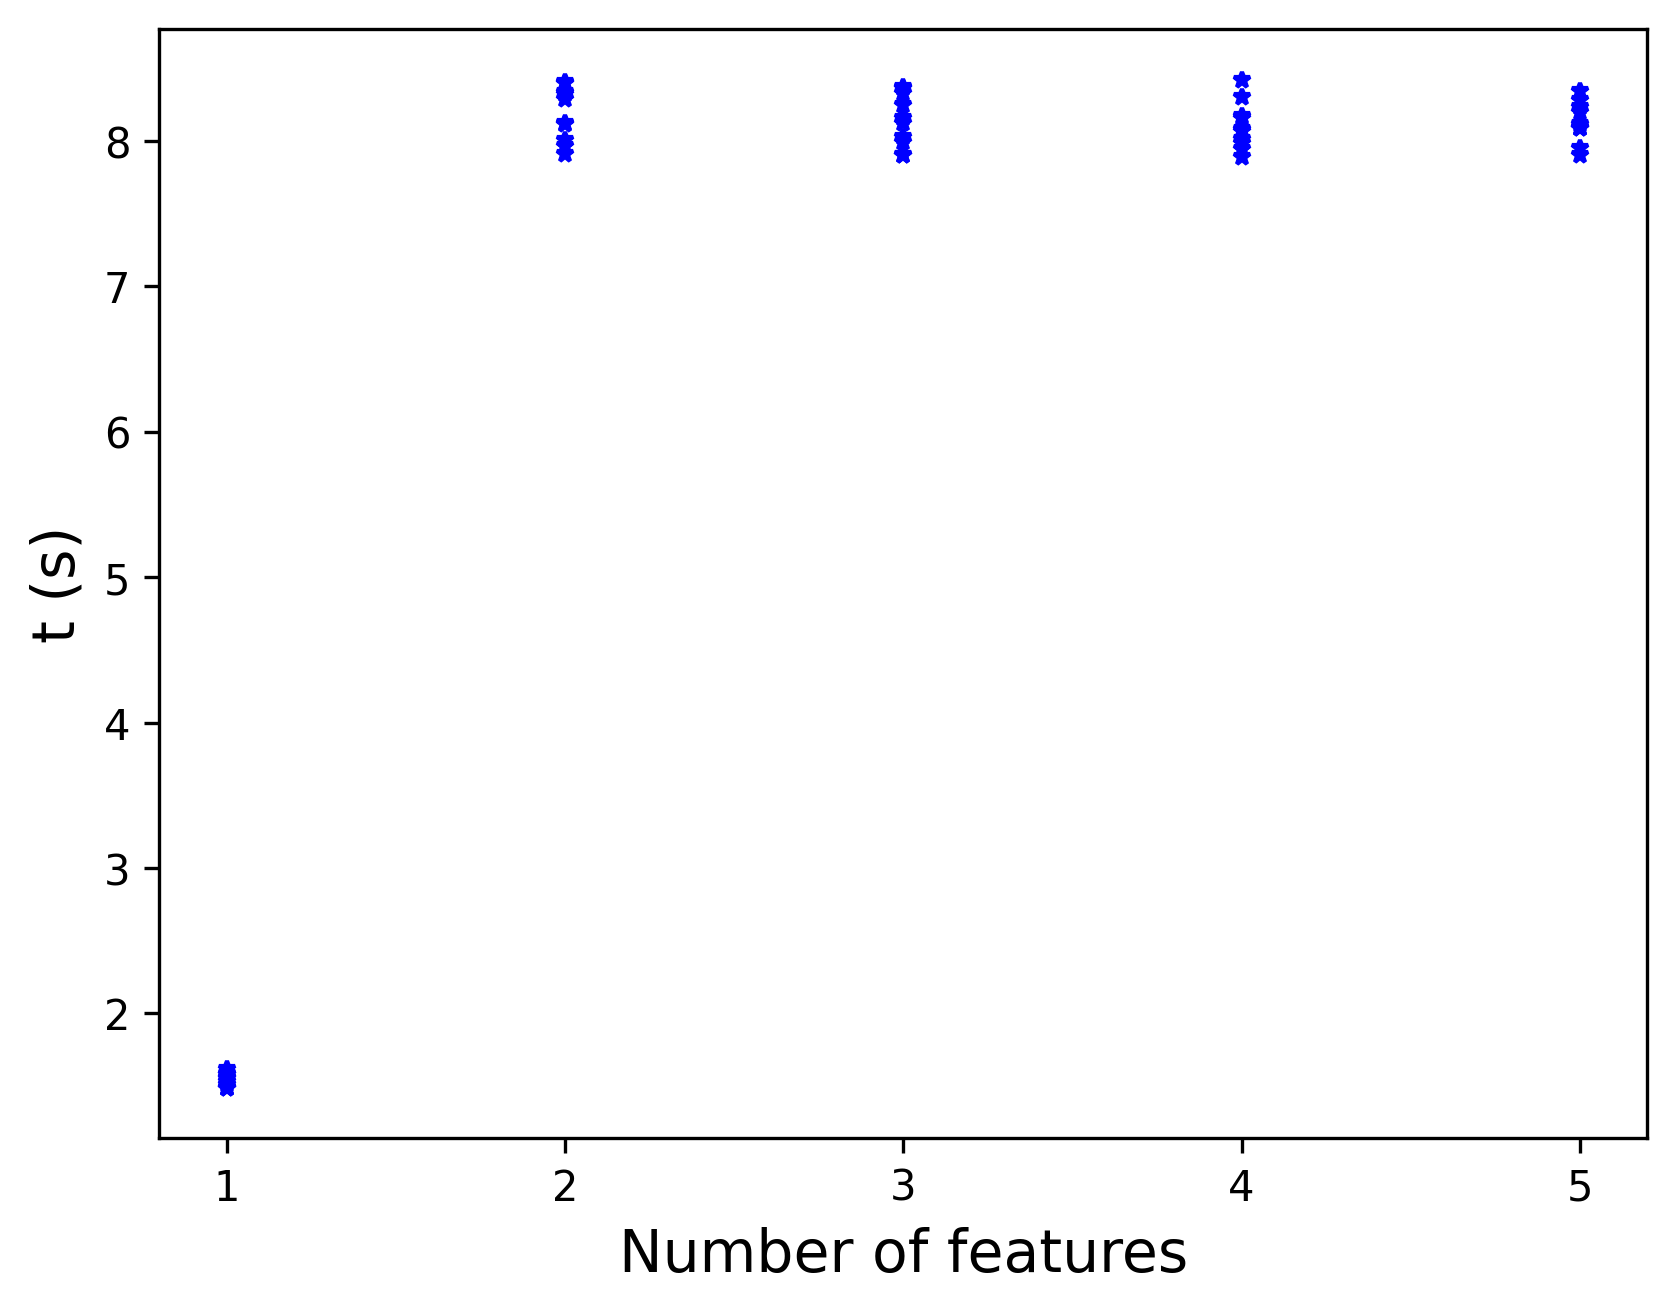

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Asegurarse de que features_list sea un array de NumPy (si no lo es ya)
features_list = [1, 2, 3, 4, 5]
features_list = np.array(features_list)

# Configuración de la figura con un DPI de 300
plt.figure(dpi=300)

# Graficar los puntos en el mismo color (ej: azul)
for k in range(times.shape[1]):  # Suponiendo que `times` es una matriz de NumPy
    plt.plot(features_list, times[:, k], '*', color='blue', markersize=4)

# Etiquetas de los ejes
plt.xlabel('Number of features', fontsize=14)
plt.ylabel('t (s)', fontsize=14)

# Configurar solo valores enteros en el eje x
plt.xticks(features_list)

# Mostrar la gráfica
plt.show()
